<a href="https://colab.research.google.com/github/sundarp17/sundar_info5731_fall2020/blob/master/semi_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

train =pd.read_csv('/content/stage-1-4.csv')
train.head()

,Sentence,Target
0,at 994.,Invalid
1,Footnote:,Invalid
2,People v. Francisco S. Palacios and Valerie M....,Invalid
3,79-0043A and 79-0044A).,Invalid
4,"Miller v. California, 93 S. Ct. 2607, 2616 n.",Invalid


In [3]:
train['Target']=train['Target'].replace(['Rule/Law/holding'],'Rule/Law/Holding')
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()

array(['Invalid', 'Facts', 'Issue', 'Rule/Law/Holding', 'Conclusion',
       'Analysis'], dtype=object)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Class=3, n=475 (12.918%)
Class=2, n=1829 (49.742%)
Class=4, n=263 (7.153%)
Class=5, n=261 (7.098%)
Class=1, n=324 (8.812%)
Class=0, n=525 (14.278%)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


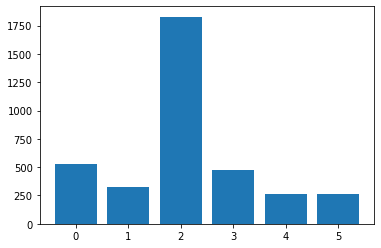

In [4]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [70]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(3677, 6371)


In [51]:
from sklearn.externals import joblib
joblib.dump(tfidf_vect, '/content/tf_idf.pkl')

['/content/tf_idf.pkl']

In [8]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,1,10,100,1000,10000,100000,10000000,10000â,1000x22,1006,1008,1008a,100x22,102,1020,1030,1042,1044,105,10511,1056,1065,107,107c,108,1084,1097,1099,10a,10acre,11,110,1102,111,1116,112,1120,113,1130,...,œsuccessively,œtell,œtestâ,œthat,œthatâ,œthe,œthem,œthere,œthey,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œunless,œupon,œvery,œvisited,œwaived,œwalked,œwas,œwe,œweaving,œwell,œwhen,œwhere,œwhether,œwhipped,œwhisky,œwhoever,œwhy,œwilliam,œwobblyâ,œwould,œyes,œyou,œyour,œyâ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=1829 (16.667%)
Class=Facts, n=1829 (16.667%)
Class=Issue, n=1829 (16.667%)
Class=Rule/Law/Holding, n=1829 (16.667%)
Class=Conclusion, n=1829 (16.667%)
Class=Analysis, n=1829 (16.667%)


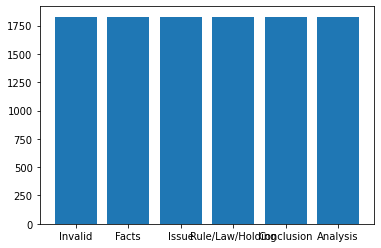

In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=777,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [29]:
#using smote and stochastic gradient boosting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

Accuracy 0.8947013162335471
                  precision    recall  f1-score   support

        Analysis       0.89      0.87      0.88       493
      Conclusion       0.88      0.95      0.91       493
           Facts       0.92      0.68      0.78       476
         Invalid       0.87      0.90      0.89       493
           Issue       0.88      0.98      0.93       511
Rule/Law/Holding       0.94      0.98      0.96       497

        accuracy                           0.89      2963
       macro avg       0.90      0.89      0.89      2963
    weighted avg       0.90      0.89      0.89      2963



In [14]:
unlabel = pd.read_csv(r'/content/Unlabeled_data.csv')
unlabel.head()

,Unnamed: 0,text,Complete
0,0,No motion for rehearing filed.,1
1,1,— Relator is under accusation of killing her h...,1
2,2,From an order of the District Judge of the 39t...,1
3,3,Relator and her husband had been married for a...,1
4,4,The evidence indicates that their family relat...,1


In [15]:
del unlabel['Complete']

In [16]:
del unlabel['Unnamed: 0']

In [17]:
unlabel.head()

,text
0,No motion for rehearing filed.
1,— Relator is under accusation of killing her h...
2,From an order of the District Judge of the 39t...
3,Relator and her husband had been married for a...
4,The evidence indicates that their family relat...


In [18]:
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))


In [19]:
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
unlabel.head()

,text
0,motion rehearing filed
1,relator accusation killing husband virgil clark
2,order district judge 39th judicial district re...
3,relator husband married number year
4,evidence indicates family relation always plea...


In [21]:
len(unlabel)

537703

In [67]:
unlabel_1 = unlabel.loc[:100000]
print("length of unlabel_1",len(unlabel_1))
unlabel_2 = unlabel.loc[100001:200000]
print("length of unlabel_2",len(unlabel_2))
unlabel_3 = unlabel.loc[200001:300000]
print("length of unlabel_3",len(unlabel_3))
unlabel_4 = unlabel.loc[300001:400000]
print("length of unlabel_4",len(unlabel_4))
unlabel_5 = unlabel.loc[400001:]
print("length of unlabel_5",len(unlabel_5))

length of unlabel_1 100001
length of unlabel_2 100000
length of unlabel_3 100000
length of unlabel_4 100000
length of unlabel_5 137702


In [72]:
x_un1 = tfidf_vect.transform(unlabel_1['text'])


In [73]:
x_un1.shape

(100001, 6371)

In [76]:
pred_unlabel_1 = sgd.predict(x_un1)

In [78]:
unlabel_1['Target']=pred_unlabel_1
unlabel_1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
0,motion rehearing filed,Facts
1,relator accusation killing husband virgil clark,Invalid
2,order district judge 39th judicial district re...,Analysis
3,relator husband married number year,Facts
4,evidence indicates family relation always plea...,Facts


In [79]:
train = train.rename(columns={'Sentence':'text'})
train.head()

,text,Target
0,at 994.,Invalid
1,Footnote:,Invalid
2,People v. Francisco S. Palacios and Valerie M....,Invalid
3,79-0043A and 79-0044A).,Invalid
4,"Miller v. California, 93 S. Ct. 2607, 2616 n.",Invalid


In [80]:
frame_1 = [train,unlabel_1]
train_1 = pd.concat(frame_1)
len(train_1)

103678

In [81]:
x_train_1 = tfidf_vect.transform(train_1['text'])
x_train_1.shape

(103678, 6371)

In [88]:
X, y = oversample.fit_resample(x_train_1, train_1['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.8723159218681336
                  precision    recall  f1-score   support

        Analysis       0.86      0.84      0.85     10922
      Conclusion       0.93      0.87      0.90     11033
           Facts       0.89      0.77      0.83     10855
         Invalid       0.85      0.89      0.87     11037
           Issue       0.87      0.92      0.89     11113
Rule/Law/Holding       0.84      0.94      0.89     11031

        accuracy                           0.87     65991
       macro avg       0.87      0.87      0.87     65991
    weighted avg       0.87      0.87      0.87     65991



In [83]:
x_un2 = tfidf_vect.transform(unlabel_2['text'])
x_un2.shape

(100000, 6371)

In [89]:
pred_unlabel_2 = sgd.predict(x_un2)

In [90]:
unlabel_2['Target']=pred_unlabel_2
unlabel_2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
100001,responding conclusion regarding evidence annou...,Conclusion
100002,conviction transporting intoxicating liquor pu...,Issue
100003,bill exception case filed late,Invalid
100004,motion new trial overruled october 22 1927 ord...,Conclusion
100005,thereafter december 10th extension order made ...,Analysis


In [91]:
frame_2 = [train_1,unlabel_2]
train_2 = pd.concat(frame_2)
len(train_2)

203678

In [92]:
x_train_2 = tfidf_vect.transform(train_2['text'])
x_train_2.shape

(203678, 6371)

In [93]:
X, y = oversample.fit_resample(x_train_2, train_2['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.8857663328401482
                  precision    recall  f1-score   support

        Analysis       0.87      0.86      0.87     19423
      Conclusion       0.94      0.89      0.91     19428
           Facts       0.92      0.78      0.84     19442
         Invalid       0.87      0.90      0.89     19734
           Issue       0.88      0.93      0.90     19487
Rule/Law/Holding       0.85      0.94      0.89     19413

        accuracy                           0.89    116927
       macro avg       0.89      0.89      0.89    116927
    weighted avg       0.89      0.89      0.89    116927



In [95]:
x_un3 = tfidf_vect.transform(unlabel_3['text'])
x_un3.shape

(100000, 6371)

In [97]:
pred_unlabel_3 = sgd.predict(x_un3)

In [98]:
unlabel_3['Target']=pred_unlabel_3
unlabel_3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
200001,another man carrying clothes,Facts
200002,officer testified appellant several item cloth...,Invalid
200003,investigation followed report breaking entry a...,Facts
200004,appellant present,Facts
200005,warrant arrest issued officer went hotel waite...,Facts


In [99]:
frame_3 = [train_2,unlabel_3]
train_3 = pd.concat(frame_3)
len(train_3)

303678

In [100]:
x_train_3 = tfidf_vect.transform(train_3['text'])
x_train_3.shape

(303678, 6371)

In [101]:
X, y = oversample.fit_resample(x_train_3, train_3['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.8928811241743887
                  precision    recall  f1-score   support

        Analysis       0.88      0.87      0.87     27325
      Conclusion       0.94      0.90      0.92     27655
           Facts       0.93      0.80      0.86     27076
         Invalid       0.88      0.91      0.89     27451
           Issue       0.89      0.93      0.91     27054
Rule/Law/Holding       0.85      0.95      0.90     27257

        accuracy                           0.89    163818
       macro avg       0.90      0.89      0.89    163818
    weighted avg       0.90      0.89      0.89    163818



In [102]:
x_un4 = tfidf_vect.transform(unlabel_4['text'])
x_un4.shape


(100000, 6371)

In [103]:
pred_unlabel_4 = sgd.predict(x_un4)
unlabel_4['Target']=pred_unlabel_4
unlabel_4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Target
300001,statute final judgment appeal court lie senten...,Rule/Law/Holding
300002,sentence must pronounced term court judgment r...,Rule/Law/Holding
300003,court sentence defendant vacation,Issue
300004,court adjourned authority case ceased notice a...,Analysis
300005,pronouncing sentence authorized vacation autho...,Conclusion


In [104]:
frame_4 = [train_3,unlabel_4]
train_4 = pd.concat(frame_4)
len(train_4)

403678

In [105]:
x_train_4 = tfidf_vect.transform(train_4['text'])
x_train_4.shape

(403678, 6371)

In [106]:
X, y = oversample.fit_resample(x_train_4, train_4['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.8980399701786874
                  precision    recall  f1-score   support

        Analysis       0.89      0.88      0.88     34619
      Conclusion       0.94      0.91      0.93     34659
           Facts       0.94      0.80      0.87     34658
         Invalid       0.88      0.91      0.90     34753
           Issue       0.90      0.93      0.91     34660
Rule/Law/Holding       0.85      0.95      0.90     34556

        accuracy                           0.90    207905
       macro avg       0.90      0.90      0.90    207905
    weighted avg       0.90      0.90      0.90    207905



In [107]:
x_un5 = tfidf_vect.transform(unlabel_5['text'])
x_un5.shape

(137702, 6371)

In [108]:
pred_unlabel_5 = sgd.predict(x_un5)
unlabel_5['Target']=pred_unlabel_5
unlabel_5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Target
400001,member federal reserve bank,Invalid
400002,opinion state case,Conclusion
400003,conviction violating state cigarette law punis...,Rule/Law/Holding
400004,find record bill exception bringing forward co...,Conclusion
400005,brief appellant complains lack testimony,Issue


In [109]:
frame_5 = [train_4,unlabel_5]
train_5 = pd.concat(frame_5)
len(train_5)

541380

In [110]:
x_train_5 = tfidf_vect.transform(train_5['text'])
x_train_5.shape

(541380, 6371)

In [111]:
X, y = oversample.fit_resample(x_train_5, train_5['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.903366641850512
                  precision    recall  f1-score   support

        Analysis       0.89      0.88      0.89     44678
      Conclusion       0.94      0.92      0.93     44634
           Facts       0.94      0.81      0.87     44431
         Invalid       0.89      0.92      0.90     44439
           Issue       0.90      0.94      0.92     44497
Rule/Law/Holding       0.87      0.95      0.91     44620

        accuracy                           0.90    267299
       macro avg       0.91      0.90      0.90    267299
    weighted avg       0.91      0.90      0.90    267299

